year : 2003


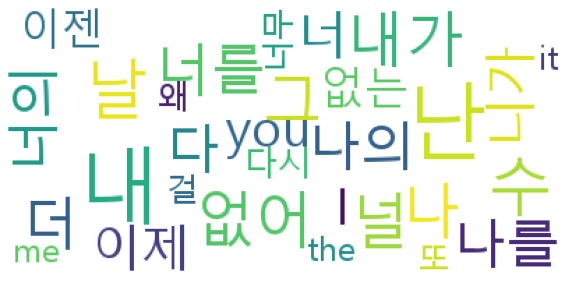

year : 2004


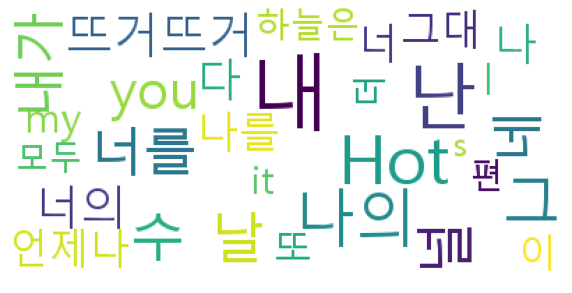

year : 2005


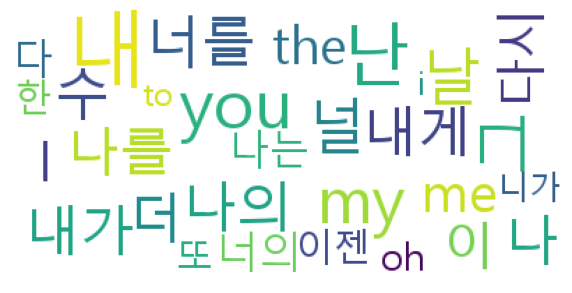

year : 2006


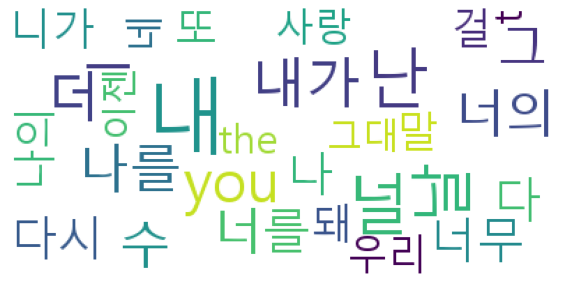

year : 2007


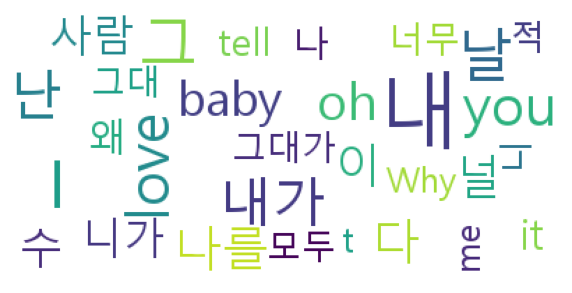

year : 2008


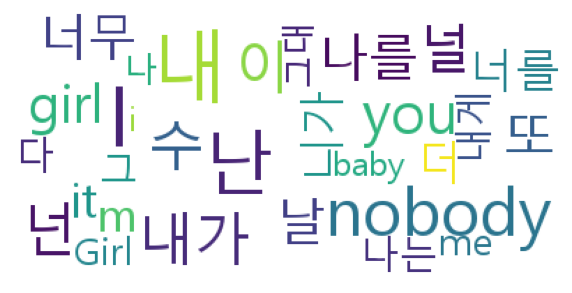

year : 2009


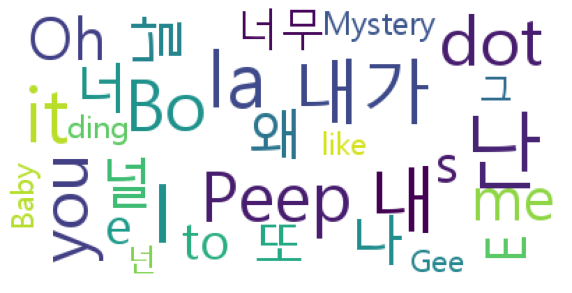

year : 2010


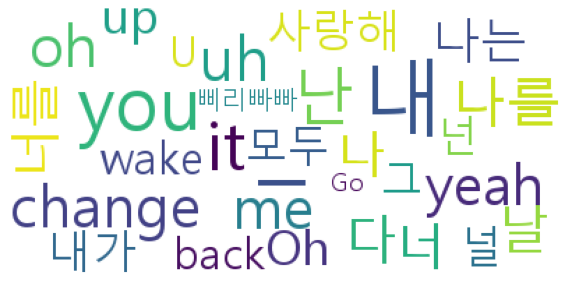

year : 2011


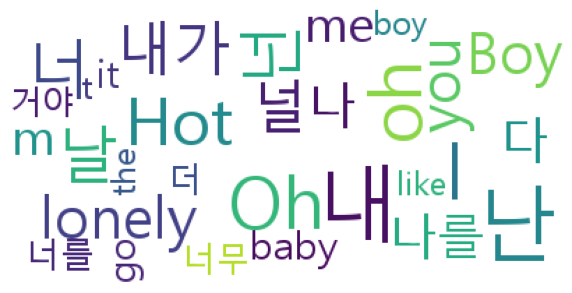

year : 2012


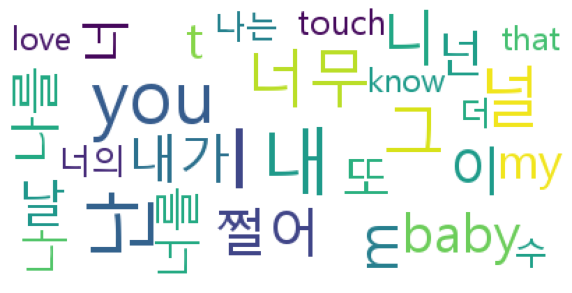

year : 2013


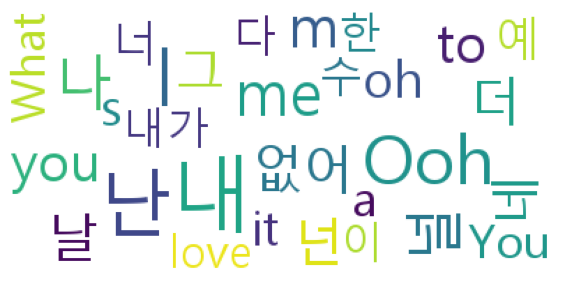

year : 2014


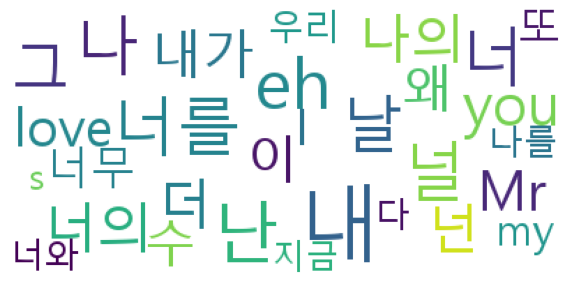

year : 2015


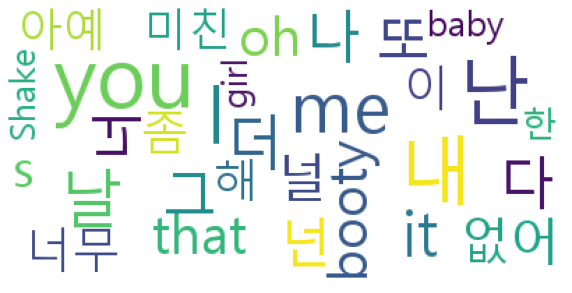

year : 2016


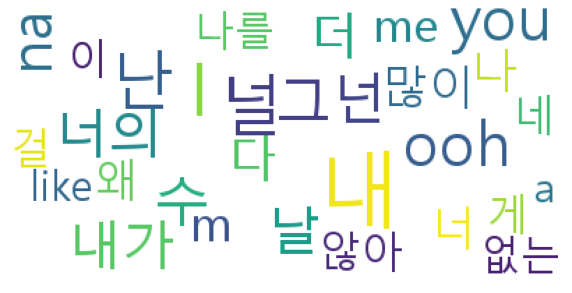

year : 2017


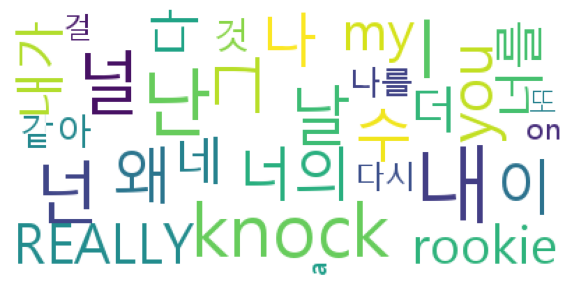

year : 2018


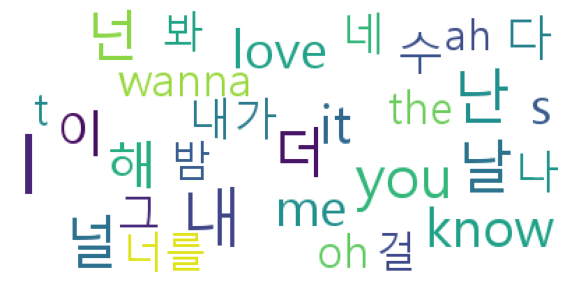

year : 2019


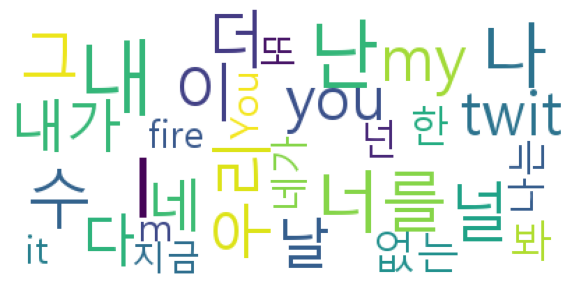

year : 2020


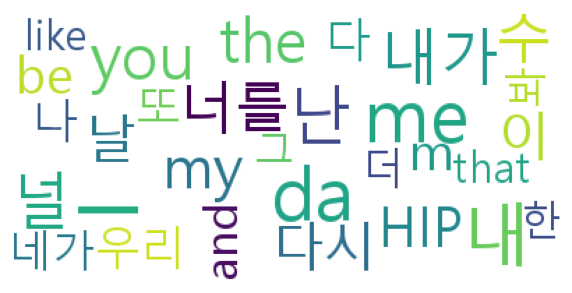

year : 2021


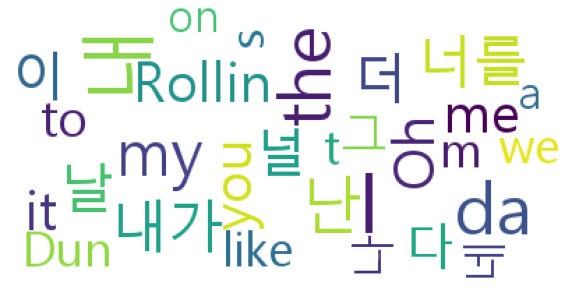

year : 2022


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [3]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import platform

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}

for yearAll in range(2003,2023):
    print(f'year : {yearAll}')
    data2 = requests.get('https://www.genie.co.kr/chart/musicHistory?year={0}&category=0'.format(yearAll),headers=headers)
    soup = BeautifulSoup(data2.text, 'html.parser')

    soup.select('div.songlist-box')
    _M21=soup.select('tbody > tr')
#     _M21

    q=[]

    for i in _M21:
        #print(i['songid'])
        q.append(i['songid'])

    name=[]
    name2=[]
    song=[]
    gasa_list=[]
     
    
    for i in q:
        data=requests.get('https://www.genie.co.kr/detail/songInfo?xgnm='+(i),headers=headers)
        soup = BeautifulSoup(data.text, 'html.parser')    
        _M21_gasa=soup.find('pre',{'id':'pLyrics'})
        if _M21_gasa == None:
            continue
        else:            
            name.append(_M21_gasa.find('div').text.split('-')[0])
            song.append(_M21_gasa.find('p').text.replace('\r','').replace('\t','').replace('\n\n','\n').replace('\n',' '))

    for i in name:
        name2.append(i[:-1])

#     print(name2)
#     print('======================================')

    for i in song:
        gasa_list.append(i)

#     print(gasa_list)
#     print('======================================')

    result = []
    for gasa in gasa_list:  # 50곡의 가사를 처음부터 한곡씩 꺼내어서 작업한다.
        # 특수문자 제거
        special_chr = ["‘", "’", "!",  ",", ".", "(", ")", "?", "&", "'", "\”", "\"", "~"]
        for char in special_chr:
            gasa = gasa.replace( char, " " )

        # 공백을 기준으로 문자열 나누기
        temp = gasa.split( " " )    # 공백으로 나누기
        for _str in temp:   # 반복문을 이용하여서 단어 하나씩 꺼내어 본다.
            if _str != "":  # 공백("")이 아닐 경우에만 해당 조건문을 수행한다.
                result.append( _str )    # 최종적으로 result 변수에 분류된 가사들을 넣는다.


    
    
    # open으로 txt파일을 열고 read()를 이용하여 읽는다.
#     text = open('test.txt', encoding='utf-8').read()
#     okt = Okt() # Open Korean Text 객체 생성

#     # okt함수를 통해 읽어들인 내용의 형태소를 분석한다.
#     sentences_tag = []
#     sentences_tag = okt.pos(text)

#     noun_adj_list = []
#     # tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
#     for word, tag in sentences_tag:
#         if tag in ['Noun' , 'Adjective']:
#             noun_adj_list.append(word)

 
    # 가장 많이 나온 단어부터 40개를 저장한다.
    counts = Counter(result)
    tags = counts.most_common(30)
    

    # WordCloud를 생성한다.
    # 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
    # 지정해준다. (ex. '/Font/GodoM.otf')
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
    cloud = wc.generate_from_frequencies(dict(tags))

    # 생성된 WordCloud를 test.jpg로 보낸다.
    #cloud.to_file('test.jpg')

    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()